# NBA Predictions using an API

In [3]:
# libraries
import numpy as np
import pandas as pd
import http.client
import json
import seaborn as sns
import matplotlib.pyplot as plt

#### NBA Team and ID Reference

In [4]:
nba_teams = pd.read_excel('data/nba_teams.xlsx')
nba_teams.sort_values(by='nickname', ascending=True)

,id,name,nickname
22,27,Philadelphia 76ers,76ers
16,21,Milwaukee Bucks,Bucks
4,6,Chicago Bulls,Bulls
5,7,Cleveland Cavaliers,Cavaliers
1,2,Boston Celtics,Celtics
12,16,LA Clippers,Clippers
14,19,Memphis Grizzlies,Grizzlies
0,1,Atlanta Hawks,Hawks
15,20,Miami Heat,Heat
3,5,Charlotte Hornets,Hornets


In [5]:
# inputs
season = 2023
home_team_id = 4
away_team_id = 38

In [6]:
# filter the DataFrame to get the team names for the home and away teams
home_team_info = nba_teams[nba_teams['id'] == home_team_id][['name', 'nickname']]
away_team_info = nba_teams[nba_teams['id'] == away_team_id][['name', 'nickname']]

# extract the team names from the filtered DataFrames
home_team = home_team_info.iloc[0]['nickname']
away_team = away_team_info.iloc[0]['nickname']

# find the full team names using the 'name' value
home_team_full = home_team_info.iloc[0]['name']
away_team_full = away_team_info.iloc[0]['name']

# display the autofilled team names
print(f"Season: {season}")
print(f"Home Team: {home_team}")
print(f"Away Team: {away_team}")

Season: 2023
Home Team: Nets
Away Team: Raptors


### Using a 3rd-party API to Scrape NBA Data

#### Gathering Team Stats by Games

Here are are pulling all of the games played by a team to find their respective home/away winrates, average home/away points scored, and average home/away points scored against

In [7]:
def fetch_team_stats(team_id, season):
    conn = http.client.HTTPSConnection("api-nba-v1.p.rapidapi.com")

    headers = {
        'X-RapidAPI-Key': "",
        'X-RapidAPI-Host': "api-nba-v1.p.rapidapi.com"
    }

    # Update the API endpoint to request games for the specified season and team
    conn.request("GET", f"/games?season={season}&team={team_id}", headers=headers)

    res = conn.getresponse()
    data = res.read()

    # decode the JSON response
    json_data = data.decode("utf-8")

    # parse the JSON data
    response_data = json.loads(json_data)

    # extract the 'data' part of the response
    games_data = response_data.get('response', [])

    # check if there is any data in the response
    if games_data:
        # create a DataFrame from the list of dictionaries
        df = pd.DataFrame(games_data)
        
        # Keep only the 'teams' and 'scores' columns
        df = df[['teams', 'scores']]
        
        # Extract relevant information from 'teams' and 'scores' columns
        df['home_team'] = df['teams'].apply(lambda x: x['home']['name'])
        df['away_team'] = df['teams'].apply(lambda x: x['visitors']['name'])
        df['home_score'] = df['scores'].apply(lambda x: x['home']['points'])
        df['away_score'] = df['scores'].apply(lambda x: x['visitors']['points'])
        
        # Drop the original 'teams' and 'scores' columns
        df = df.drop(['teams', 'scores'], axis=1)
        
        # Drop rows with NaN values
        df = df.dropna()

        return df
    else:
        print("No data in the response.")
        return None

# Example usage for home and away teams
home_team_stats_df_api = fetch_team_stats(home_team_id, season)
away_team_stats_df_api = fetch_team_stats(away_team_id, season)

In [8]:
home_team_stats_df_api

,home_team,away_team,home_score,away_score
0,Los Angeles Lakers,Brooklyn Nets,129.0,126.0
1,Brooklyn Nets,Ra'anana Maccabi Ra'anana,135.0,103.0
2,Brooklyn Nets,Philadelphia 76ers,119.0,127.0
3,Miami Heat,Brooklyn Nets,104.0,107.0
4,Brooklyn Nets,Cleveland Cavaliers,113.0,114.0
5,Dallas Mavericks,Brooklyn Nets,125.0,120.0
6,Charlotte Hornets,Brooklyn Nets,121.0,133.0
7,Miami Heat,Brooklyn Nets,105.0,109.0
8,Chicago Bulls,Brooklyn Nets,107.0,109.0
9,Brooklyn Nets,Boston Celtics,114.0,124.0


In [9]:
def process_team_data(team_stats_df, team_id, team_full_name):
    # Filter the DataFrame for the specific team
    team_home_stats_df = team_stats_df[team_stats_df['home_team'] == team_full_name]
    team_away_stats_df = team_stats_df[team_stats_df['away_team'] == team_full_name]

    # Check for missing values
    if team_home_stats_df['home_score'].isnull().any() or team_away_stats_df['away_score'].isnull().any():
        print("Warning: Missing values found in 'home_score' or 'away_score'. Please check your data.")
        return None

    # Calculate home and away win rates for the team
    home_win_rate = team_home_stats_df['home_score'].gt(team_home_stats_df['away_score']).mean()
    away_win_rate = team_away_stats_df['away_score'].gt(team_away_stats_df['home_score']).mean()

    # Check for division by zero
    if len(team_home_stats_df) == 0 or len(team_away_stats_df) == 0:
        print("Warning: Division by zero. No games recorded for the team.")
        return None

    # Calculate combined win rate
    combined_win_rate = (
        team_home_stats_df['home_score'].gt(team_home_stats_df['away_score']).sum() +
        team_away_stats_df['away_score'].gt(team_away_stats_df['home_score']).sum()
    ) / (
        len(team_home_stats_df) + len(team_away_stats_df)
    )

    # Calculate average points scored and allowed for the team
    avg_points_scored_home = team_home_stats_df['home_score'].mean()
    avg_points_scored_away = team_away_stats_df['away_score'].mean()

    avg_points_allowed_home = team_home_stats_df['away_score'].mean()
    avg_points_allowed_away = team_away_stats_df['home_score'].mean()

    # Create a DataFrame for team stats
    team_stats_df = pd.DataFrame({
        'team_id': [team_id],
        'team_name': [team_full_name],
        'home_win_rate': [home_win_rate],
        'away_win_rate': [away_win_rate],
        'combined_win_rate': [combined_win_rate],
        'avg_points_scored_home': [avg_points_scored_home],
        'avg_points_scored_away': [avg_points_scored_away],
        'avg_points_allowed_home': [avg_points_allowed_home],
        'avg_points_allowed_away': [avg_points_allowed_away],
    })

    return team_stats_df

# Process team data for home team
home_team_stats_result = process_team_data(home_team_stats_df_api, home_team_id, home_team_full)

# Process team data for away team
away_team_stats_result = process_team_data(away_team_stats_df_api, away_team_id, away_team_full)

# Rename columns for the home team
home_team_stats_result.rename(columns={
    'avg_points_scored_home': 'avg_points_scored',
    'avg_points_allowed_home': 'avg_points_allowed'
}, inplace=True)

# Rename columns for the away team
away_team_stats_result.rename(columns={
    'avg_points_scored_away': 'avg_points_scored',
    'avg_points_allowed_away': 'avg_points_allowed'
}, inplace=True)

home_team_stats_result

,team_id,team_name,home_win_rate,away_win_rate,combined_win_rate,avg_points_scored,avg_points_scored_away,avg_points_allowed,avg_points_allowed_away
0,4,Brooklyn Nets,0.526316,0.4375,0.485714,117.052632,116.625,113.0,120.125


In [10]:
away_team_stats_result

,team_id,team_name,home_win_rate,away_win_rate,combined_win_rate,avg_points_scored_home,avg_points_scored,avg_points_allowed_home,avg_points_allowed
0,38,Toronto Raptors,0.55,0.357143,0.470588,114.65,113.214286,109.95,116.0


In [11]:
# Extracting values from home_team_stats_result
home_team_id = home_team_stats_result.iloc[0]['team_id']
home_team_name = home_team_stats_result.iloc[0]['team_name']
home_win_rate = home_team_stats_result.iloc[0]['home_win_rate']
combined_win_rate_home = home_team_stats_result.iloc[0]['combined_win_rate']
avg_points_scored_home = home_team_stats_result.iloc[0]['avg_points_scored']
avg_points_allowed_home = home_team_stats_result.iloc[0]['avg_points_allowed']

# Extracting values from away_team_stats_result
away_team_id = away_team_stats_result.iloc[0]['team_id']
away_team_name = away_team_stats_result.iloc[0]['team_name']
away_win_rate = away_team_stats_result.iloc[0]['away_win_rate']
combined_win_rate_away = away_team_stats_result.iloc[0]['combined_win_rate']
avg_points_scored_away = away_team_stats_result.iloc[0]['avg_points_scored']
avg_points_allowed_away = away_team_stats_result.iloc[0]['avg_points_allowed']

# Displaying the extracted values with rounding
print("Home Team Stats:")
print(f"Team ID: {home_team_id}")
print(f"Team Name: {home_team_name}")
print(f"Home Win Rate: {home_win_rate:.2f}")
print(f"Combined Win Rate: {combined_win_rate_home:.2f}")
print(f"Avg Points Scored (Home): {avg_points_scored_home:.2f}")
print(f"Avg Points Allowed (Home): {avg_points_allowed_home:.2f}")

print("\nAway Team Stats:")
print(f"Team ID: {away_team_id}")
print(f"Team Name: {away_team_name}")
print(f"Away Win Rate: {away_win_rate:.2f}")
print(f"Combined Win Rate: {combined_win_rate_away:.2f}")
print(f"Avg Points Scored (Away): {avg_points_scored_away:.2f}")
print(f"Avg Points Allowed (Away): {avg_points_allowed_away:.2f}")

Home Team Stats:
Team ID: 4
Team Name: Brooklyn Nets
Home Win Rate: 0.53
Combined Win Rate: 0.49
Avg Points Scored (Home): 117.05
Avg Points Allowed (Home): 113.00

Away Team Stats:
Team ID: 38
Team Name: Toronto Raptors
Away Win Rate: 0.36
Combined Win Rate: 0.47
Avg Points Scored (Away): 113.21
Avg Points Allowed (Away): 116.00


#### Gathering Player Stats by Team

In [12]:
def fetch_player_stats(team_id, season):
    conn = http.client.HTTPSConnection("api-nba-v1.p.rapidapi.com")

    headers = {
        'X-RapidAPI-Key': "",
        'X-RapidAPI-Host': "api-nba-v1.p.rapidapi.com"
    }

    conn.request("GET", f"/players/statistics?team={team_id}&season={season}", headers=headers)

    res = conn.getresponse()
    data = res.read()

    # decode the JSON response
    json_data = data.decode("utf-8")

    # parse the JSON data
    response_data = json.loads(json_data)

    # extract the 'response' part of the data
    player_statistics_data = response_data.get('response', [])

    # check if there is any data in the response
    if player_statistics_data:
        # create a DataFrame with standardized column names
        df = pd.json_normalize(player_statistics_data)

        # Ensure consistent column names
        df = df.rename(columns={
            'game.id': 'game',
            'player.id': 'player',
            'team.id': 'team'
        })

        return df
    else:
        print("No data in the response.")
        return None

# Example usage for home and away teams
home_player_stats_df_api = fetch_player_stats(home_team_id, season)
away_player_stats_df_api = fetch_player_stats(away_team_id, season)

In [13]:
home_player_stats_df_api

,points,pos,min,fgm,fga,fgp,ftm,fta,ftp,tpm,...,comment,player,player.firstname,player.lastname,team,team.name,team.nickname,team.code,team.logo,game
0,8,SF,15,2,7,28.6,4,5,80.0,0,...,None,940,Mikal,Bridges,4,Brooklyn Nets,Nets,BKN,https://upload.wikimedia.org/wikipedia/commons...,12488
1,7,C,16,3,3,100.0,1,2,50.0,0,...,None,1854,Nic,Claxton,4,Brooklyn Nets,Nets,BKN,https://upload.wikimedia.org/wikipedia/commons...,12488
2,12,PG,16,4,5,80.0,0,0,0,4,...,None,142,Spencer,Dinwiddie,4,Brooklyn Nets,Nets,BKN,https://upload.wikimedia.org/wikipedia/commons...,12488
3,10,PG,14,4,6,66.7,2,4,50.0,0,...,None,481,Ben,Simmons,4,Brooklyn Nets,Nets,BKN,https://upload.wikimedia.org/wikipedia/commons...,12488
4,26,SG,22,9,14,64.3,4,4,100.0,4,...,None,2855,Cam,Thomas,4,Brooklyn Nets,Nets,BKN,https://upload.wikimedia.org/wikipedia/commons...,12488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,21,F,30,5,13,38.5,11,11,100.0,0,...,None,3946,Jalen,Wilson,4,Brooklyn Nets,Nets,BKN,https://upload.wikimedia.org/wikipedia/commons...,12965
358,2,F,21,1,5,20.0,0,0,0,0,...,None,3945,Dariq,Whitehead,4,Brooklyn Nets,Nets,BKN,https://upload.wikimedia.org/wikipedia/commons...,12965
359,14,F,24,6,9,66.7,2,2,100.0,0,...,None,3944,Noah,Clowney,4,Brooklyn Nets,Nets,BKN,https://upload.wikimedia.org/wikipedia/commons...,12965
360,12,G,29,4,14,28.6,1,2,50.0,3,...,None,2325,Armoni,Brooks,4,Brooklyn Nets,Nets,BKN,https://upload.wikimedia.org/wikipedia/commons...,12965


In [14]:
home_team_unique_games = set(map(str, home_player_stats_df_api['game']))
away_team_unique_games = set(map(str, away_player_stats_df_api['game']))

home_team_games_played = len(home_team_unique_games)
away_team_games_played = len(away_team_unique_games)

def extract_player_id(player_info):
    # use a regular expression to extract numbers
    player_id = int(''.join(filter(str.isdigit, str(player_info))))
    return player_id

def extract_team_id(team_info):
    # extract the first 10 characters from the 'team' column
    team_id = int(''.join(filter(str.isdigit, str(team_info)[:10])))
    return team_id

def dataframe_cleaner(df):

    # extract 'id' from 'player' column
    df['playerID'] = df['player'].apply(extract_player_id)

    # extract 'id' from 'player' column
    df['teamID'] = df['team'].apply(extract_team_id)

    return df

home_player_stats_df = dataframe_cleaner(home_player_stats_df_api)
away_player_stats_df = dataframe_cleaner(away_player_stats_df_api)

print("Complete")

Complete


In [15]:
away_player_stats_df

,points,pos,min,fgm,fga,fgp,ftm,fta,ftp,tpm,...,player.firstname,player.lastname,team,team.name,team.nickname,team.code,team.logo,game,playerID,teamID
0,8,PF,20,3,6,50.0,2,3,66.7,0,...,Pascal,Siakam,38,Toronto Raptors,Raptors,TOR,https://upload.wikimedia.org/wikipedia/fr/8/89...,12484,479,38
1,14,SF,20,6,7,85.7,0,0,0,2,...,O.G.,Anunoby,38,Toronto Raptors,Raptors,TOR,https://upload.wikimedia.org/wikipedia/fr/8/89...,12484,732,38
2,15,SF,18,5,9,55.6,5,7,71.4,0,...,Scottie,Barnes,38,Toronto Raptors,Raptors,TOR,https://upload.wikimedia.org/wikipedia/fr/8/89...,12484,2789,38
3,4,C,19,2,4,50.0,0,0,0,0,...,Jakob,Poeltl,38,Toronto Raptors,Raptors,TOR,https://upload.wikimedia.org/wikipedia/fr/8/89...,12484,428,38
4,6,PG,17,1,3,33.3,3,4,75.0,1,...,Dennis,Schroder,38,Toronto Raptors,Raptors,TOR,https://upload.wikimedia.org/wikipedia/fr/8/89...,12484,472,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,3,PF,11,1,2,50.0,1,2,50.0,0,...,Precious,Achiuwa,38,Toronto Raptors,Raptors,TOR,https://upload.wikimedia.org/wikipedia/fr/8/89...,12964,2561,38
373,6,SF,13,3,3,100.0,0,0,0,0,...,Otto,Porter Jr.,38,Toronto Raptors,Raptors,TOR,https://upload.wikimedia.org/wikipedia/fr/8/89...,12964,430,38
374,9,PG,28,4,6,66.7,0,0,0,1,...,Dennis,Schroder,38,Toronto Raptors,Raptors,TOR,https://upload.wikimedia.org/wikipedia/fr/8/89...,12964,472,38
375,6,PG,5,2,3,66.7,0,0,0,2,...,Malachi,Flynn,38,Toronto Raptors,Raptors,TOR,https://upload.wikimedia.org/wikipedia/fr/8/89...,12964,2587,38


#### Finding Means

In [16]:
# list of columns to be kept
columns_to_keep = ['teamID', 'points', 'min', 'fgp', 'ftp', 'tpp', 'offReb', 'defReb', 'assists', 'pFouls', 'steals', 'turnovers', 'blocks']

def calculate_means(df, columns_to_keep):
    # select only the specified columns
    selected_df = df[columns_to_keep + ['playerID']].copy()

    # check if 'player_id' column exists
    if 'playerID' in df.columns:
        # Convert selected columns to numeric (handling errors)
        selected_df[columns_to_keep] = selected_df[columns_to_keep].apply(pd.to_numeric, errors='coerce')

        # Group by 'player_id' and calculate mean values and games played
        group_df = selected_df.groupby('playerID')
        mean_values_df = group_df.mean().reset_index()
        games_played_df = group_df.size().reset_index(name='gamesPlayed')

        # Merge mean values and games played on 'player_id'
        result_df = pd.merge(mean_values_df, games_played_df, on='playerID')

        result_df['playerPoints'] = result_df['gamesPlayed'] * result_df['points']
        
        # Add 'playTime' column
        result_df['playTime'] = result_df['min'] * result_df['gamesPlayed']

        # Drop 'min' and 'gamesPlayed' columns
        result_df.drop(columns=['min', 'gamesPlayed'], inplace=True)

        # converting percentage values into decimals
        result_df['fgp'] = result_df['fgp'] / 100
        result_df['ftp'] = result_df['ftp'] / 100
        result_df['tpp'] = result_df['tpp'] / 100

        return result_df

home_player_mean_stats_df = calculate_means(home_player_stats_df, columns_to_keep)
away_player_mean_stats_df = calculate_means(away_player_stats_df, columns_to_keep)

home_player_mean_stats_df

,playerID,teamID,points,fgp,ftp,tpp,offReb,defReb,assists,pFouls,steals,turnovers,blocks,playerPoints,playTime
0,142,4.0,13.757576,0.403970,0.651970,0.334758,0.575758,3.242424,6.393939,1.606061,0.787879,1.545455,0.212121,454.0,1021.0
1,175,4.0,10.156250,0.473875,0.140625,0.437437,1.750000,2.812500,1.218750,2.062500,0.656250,0.843750,0.500000,325.0,904.0
2,481,4.0,6.500000,0.479100,0.200000,0.000000,1.700000,6.900000,6.800000,2.400000,0.800000,3.000000,0.600000,65.0,278.0
3,851,4.0,7.852941,0.397618,0.183824,0.394059,0.764706,3.941176,3.176471,2.382353,0.735294,0.911765,0.794118,267.0,867.0
4,876,4.0,6.631579,0.367053,0.315789,0.193000,0.684211,2.105263,3.526316,2.105263,0.842105,0.947368,0.157895,126.0,334.0
5,940,4.0,20.500000,0.463618,0.698912,0.354647,0.970588,4.117647,3.617647,1.558824,0.794118,2.352941,0.382353,697.0,1123.0
6,1038,4.0,14.761905,0.481857,0.566381,0.431238,0.238095,2.285714,1.523810,0.904762,0.761905,1.380952,0.380952,310.0,439.0
7,1847,4.0,5.666667,0.550000,0.333333,0.444333,1.333333,5.000000,2.000000,1.000000,1.000000,2.666667,0.333333,17.0,60.0
8,1854,4.0,11.291667,0.669667,0.506917,0.041667,2.625000,6.208333,1.625000,2.458333,0.458333,1.000000,2.416667,271.0,635.0
9,1871,4.0,14.956522,0.480826,0.496391,0.414348,1.304348,3.478261,2.478261,1.826087,0.826087,1.043478,0.130435,344.0,656.0


#### Offensive Rating Calc

In [17]:
def calculate_offensive_rating(df, team_name_column='teamID'):
    # create a new DataFrame for offensive evaluation
    offensive_df = df.copy()

    # weights for each column
    weights_offensive = {
        'points': 10.0, # points scored
        'fgp': 12.0, # field goal percentage
        'tpp': 15.0, # three-point percentage
        'ftp': 8.0, # free throw percentage
        'offReb': 1.5, # offensive rebounds
        'assists': 2.0, # assists
        'turnovers': -2.0, # turnovers
        'pFouls': -1.5, # personal fouls
    }

    # apply weights to columns
    weighted_columns_offensive = offensive_df[list(weights_offensive.keys())].multiply(weights_offensive)
    offensive_df['Weighted_Score'] = weighted_columns_offensive.sum(axis=1)
    
    # multiply by 'playTime' column
    offensive_df['Weighted_Score'] = offensive_df['Weighted_Score'] * offensive_df['playTime']

    # calculating offensive rating for each player
    offensive_df['Offensive_Rating'] = offensive_df['Weighted_Score'] / offensive_df['playTime']

    # calculate team offensive rating using player ratings and amount of time played
    team_offensive_rating = offensive_df.groupby(team_name_column)['Offensive_Rating'].sum() / offensive_df.groupby(team_name_column)['playTime'].sum()

    return team_offensive_rating.values[0] * 100

home_off_rating = calculate_offensive_rating(home_player_mean_stats_df)
away_off_rating = calculate_offensive_rating(away_player_mean_stats_df)

print(f"{home_team} Offensive Rating: {home_off_rating:.2f}")
print(f"{away_team} Offensive Rating: {away_off_rating:.2f}")

# Calculate percentage difference
off_diff = home_off_rating - away_off_rating
off_percentage_diff = abs((off_diff / away_off_rating) * 100)

# Print percentage difference
print(f"Offensive Rating % Difference: {off_percentage_diff:.2f}%")

Nets Offensive Rating: 24.80
Raptors Offensive Rating: 21.62
Offensive Rating % Difference: 14.71%


#### Deffensive Rating

In [18]:
def calculate_defensive_rating(df, team_name_column='teamID'):
    # create a new DataFrame for defensive evaluation
    defensive_df = df.copy()

    # weights for each column
    weights_defensive = {
        'defReb': 1.0,  # defensive rebounds
        'pFouls': -0.75,  # personal fouls
        'steals': 1.0,  # steals
        'blocks': 0.8,  # blocks
    }

    # apply weights to columns
    weighted_columns_defensive = defensive_df[list(weights_defensive.keys())].multiply(weights_defensive)
    defensive_df['Weighted_Score'] = weighted_columns_defensive.sum(axis=1)

    # multiply by 'playTime' column
    defensive_df['Weighted_Score'] = defensive_df['Weighted_Score'] * defensive_df['playTime']

    # calculating defensive rating for each player
    defensive_df['Defensive_Rating'] = defensive_df['Weighted_Score'] / defensive_df['playTime']

    # calculate team defensive rating using player ratings and amount of time played
    team_defensive_rating = defensive_df.groupby(team_name_column)['Defensive_Rating'].sum() / defensive_df.groupby(team_name_column)['playTime'].sum()

    return team_defensive_rating.values[0] * 10000

home_def_rating = calculate_defensive_rating(home_player_mean_stats_df)
away_def_rating = calculate_defensive_rating(away_player_mean_stats_df)

print(f"{home_team} Defensive Rating: {home_def_rating:.2f}")
print(f"{away_team} Defensive Rating: {away_def_rating:.2f}")

# Calculate and print percentage difference
def_diff = home_def_rating - away_def_rating
def_percentage_diff = abs((def_diff / away_def_rating) * 100)
print(f"Defensive Rating % Difference: {def_percentage_diff:.2f}%")

Nets Defensive Rating: 63.84
Raptors Defensive Rating: 55.06
Defensive Rating % Difference: 15.95%


#### Score Prediction

In [19]:
# Determine which team has a better offensive rating
better_off_team = home_team if home_off_rating > away_off_rating else away_team
worse_off_team = away_team if home_off_rating > away_off_rating else home_team

# Determine which team has a better defensive rating
better_def_team = home_team if home_def_rating > away_def_rating else away_team
worse_def_team = away_team if home_def_rating > away_def_rating else home_team

# Weight factors for adjusting scores
offensive_weight_factor = 0.003
defensive_weight_factor = 0.003
win_rate_weight_factor = 0.1

# Adjust average scores based on percentage differences and win rates
adjusted_average_score_home = (
    avg_points_scored_home +
    (off_percentage_diff * offensive_weight_factor * avg_points_scored_home) -
    (def_percentage_diff * defensive_weight_factor * avg_points_allowed_home) +
    (home_win_rate * win_rate_weight_factor * avg_points_scored_home)
)

adjusted_average_score_away = (
    avg_points_scored_away -
    (off_percentage_diff * offensive_weight_factor * avg_points_scored_away) +
    (def_percentage_diff * defensive_weight_factor * avg_points_allowed_away) +
    (away_win_rate * win_rate_weight_factor * avg_points_scored_away)
)

# Determine better and worse team scores
if adjusted_average_score_home > adjusted_average_score_away:
    better_team_score = adjusted_average_score_home
    worse_team_score = adjusted_average_score_away
else:
    better_team_score = adjusted_average_score_away
    worse_team_score = adjusted_average_score_home

print(f"Home Team ({home_team}) Offensive Rating: {home_off_rating:.2f}")
print(f"Away Team ({away_team}) Offensive Rating: {away_off_rating:.2f}")
print(f"The {better_off_team} offense is {off_percentage_diff:.2f}% better than that of the {worse_off_team}")

print(f"\nHome Team ({home_team}) Defensive Rating: {home_def_rating:.2f}")
print(f"Away Team ({away_team}) Defensive Rating: {away_def_rating:.2f}")
print(f"The {better_def_team} defense is {def_percentage_diff:.2f}% better than that of the {worse_def_team}")

print(f"\nPredicted Score for the {home_team}: {adjusted_average_score_home:.0f}")
print(f"Predicted Score for the {away_team}: {adjusted_average_score_away:.0f}")

Home Team (Nets) Offensive Rating: 24.80
Away Team (Raptors) Offensive Rating: 21.62
The Nets offense is 14.71% better than that of the Raptors

Home Team (Nets) Defensive Rating: 63.84
Away Team (Raptors) Defensive Rating: 55.06
The Nets defense is 15.95% better than that of the Raptors

Predicted Score for the Nets: 123
Predicted Score for the Raptors: 118


#### Bootstrapping

Simulated 10000 bootstrap samples:
The Nets beat the Raptors in 72.53% of the bootstraped samples with an average score of 123 to 118
There is a predicted 90% chance that the Nets will score between 113 and 133 points.
There is a predicted 90% chance that the Raptors will score between 108 and 128 points.


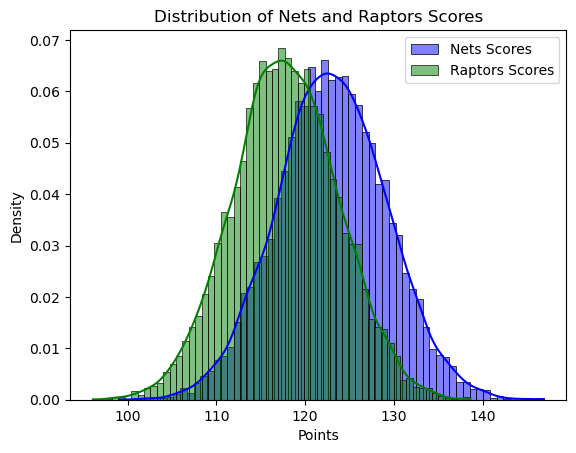

In [20]:
# Number of bootstrap samples
num_samples = 10000

# Mean and standard deviation for the normal distribution
mean_randomization_factor = 1.0
std_dev_randomization_factor = 0.05

# Arrays to store the sampled scores
home_scores = np.zeros(num_samples)
away_scores = np.zeros(num_samples)

# Simulate bootstrap samples
for i in range(num_samples):
    # Sample randomization factors from a normal distribution
    randomization_factor_home = np.random.normal(mean_randomization_factor, std_dev_randomization_factor)
    randomization_factor_away = np.random.normal(mean_randomization_factor, std_dev_randomization_factor)

    # Calculate each team's score
    home_score = adjusted_average_score_home * randomization_factor_home
    away_score = adjusted_average_score_away * randomization_factor_away

    # Store sampled scores
    home_scores[i] = home_score
    away_scores[i] = away_score

# Calculate win percentage
win_percentage_home = np.sum(home_scores > away_scores) / num_samples * 100

# Use np.mean directly instead of creating sets
home_score = np.mean(home_scores)
away_score = np.mean(away_scores)

# labeling as 'better' or 'worse'
better_team = home_team if home_score > away_score else away_team
worse_team = away_team if home_score > away_score else home_team

better_team_score = home_score if home_score > away_score else away_score
worse_team_score = away_score if home_score > away_score else home_score

# Print results
print(f"Simulated {num_samples} bootstrap samples:")
print(f"The {better_team} beat the {worse_team} in {win_percentage_home:.2f}% of the bootstraped samples with an average score of {better_team_score:.0f} to {worse_team_score:.0f}")

# Calculate the lower and upper bounds for the middle 90%
lower_bound_home = np.percentile(home_scores, 5)
upper_bound_home = np.percentile(home_scores, 95)

lower_bound_away = np.percentile(away_scores, 5)
upper_bound_away = np.percentile(away_scores, 95)

# Print the range of scores for the middle 90%
print(f"There is a predicted 90% chance that the {home_team} will score between {lower_bound_home:.0f} and {upper_bound_home:.0f} points.")
print(f"There is a predicted 90% chance that the {away_team} will score between {lower_bound_away:.0f} and {upper_bound_away:.0f} points.")

# Plot side-by-side bell curves for home and away scores
sns.histplot(home_scores, kde=True, stat="density", color="blue", label=f"{home_team} Scores")
sns.histplot(away_scores, kde=True, stat="density", color="green", label=f"{away_team} Scores")
plt.title(f"Distribution of {home_team} and {away_team} Scores")
plt.xlabel("Points")
plt.ylabel("Density")
plt.legend()
plt.show()